<h1>Analysis on Insurance Costs of U.S. Adults</h1>

The 'insurances.csv' dataset is composed of 7 columns: <br><b>
    <blockquote>age<br>
    sex<br>
    bmi<br>
    child<br>
    smoker<br>
    region<br>
        charges<br></blockquote>
    </b>
I will use 'charges' as the outcome variable, and the rest as independent variables. In prior to the analysis, I will briefly summarize an important detail of this dataset.


The <b>median</b> of <b>'charges'</b> is approximately <b>9382.03</b>, and the <b>mean</b> of <b>'charges'</b> is approximately  <b>13270.42</b>; <i>the mean is <b>41.44%</b> higher than the median</i>. 

Moreover, the histogram displays that the distribution is <i>skewed to the right</i>. In order to account for the skewedness, I will <b>use median instead of mean</b> to evaluate the distributions.

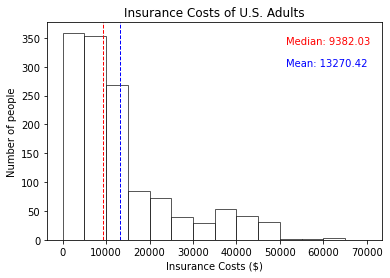

<Figure size 432x288 with 0 Axes>

In [3]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Reading in the data from 'insurances.csv'
insurances = pd.read_csv('insurance.csv')

# Plotting a histogram with labels and a title
plt.hist(insurances.charges, range=(0, 70000), bins=14, edgecolor='k', alpha=0.65, color='white')
plt.title('Insurance Costs of U.S. Adults')
plt.xlabel('Insurance Costs ($)')
plt.ylabel('Number of people')

# Plotting the median and mean line on the histogram
plt.axvline(insurances.charges.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(insurances.charges.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
plt.text(max_xlim*0.7, max_ylim * 0.8, f'Mean: {round(insurances.charges.mean(), 2)}', color='b')
plt.text(max_xlim*0.7, max_ylim * 0.9, f'Median: {round(insurances.charges.median(),2)}', color='r')

plt.show()
plt.clf()


<h3>Part 1: Determine the strongest and the weakest correlated factor to the insurance charges</h3>

In [4]:
# Function that converts each 'region' string value into an integer value
def region_index(x):
	if x == 'southwest':
		return 1
	elif x == 'southeast':
		return 2
	elif x == 'northwest':
		return 3
	else:
		return 4

# Converting the string values into integer values for easier computation
insurances['sex'] = insurances.sex.apply(lambda x: 1 if x =="male" else 2)
insurances['smoker'] = insurances.smoker.apply(lambda x: 1 if x =='yes' else 0)
insurances['region'] = insurances.region.apply(lambda x: region_index(x))

#Calculating the correlation coefficient of each variable with the insurance charges
age_charges = insurances['age'].corr(insurances['charges'])
sex_charges = insurances['sex'].corr(insurances['charges'])
bmi_charges = insurances['bmi'].corr(insurances['charges'])
child_charges = insurances['children'].corr(insurances['charges'])
smoker_charges = insurances['smoker'].corr(insurances['charges'])
region_charges = insurances['region'].corr(insurances['charges'])

# Creating a table of variables against the correlation coefficients to easily compare the values
charges_corr_df = pd.DataFrame({'variables': ['age', 'sex', 'bmi', 'child', 'smoker', 'region'], 'corr_coeff': [age_charges, sex_charges, bmi_charges, child_charges, smoker_charges, region_charges]})
print(charges_corr_df)

  variables  corr_coeff
0       age    0.299008
1       sex   -0.057292
2       bmi    0.198341
3     child    0.067998
4    smoker    0.787251
5    region    0.006208


The table shows that the <b>'smoker'</b> variable has the strongest correlation with <b>'charges'</b>, and <b>'region'</b> has the weakest (or almost no) correlation with <b>'charges'</b>. This contradicts my initial hypothesis that <i><b>"bmi"</b> would be the largest contributing factor to the insurance charges</i> (<b>"bmi"</b> in fact had a low correlation coefficient value of less than <b>0.2</b>). 

Let us dig deeper into the relationship between <b>'smoker'</b> and <b>'charges'</b>. The easiest way to find if there exists a linear relationship between these two variables is using the scatter plot to visually represent the relationship.



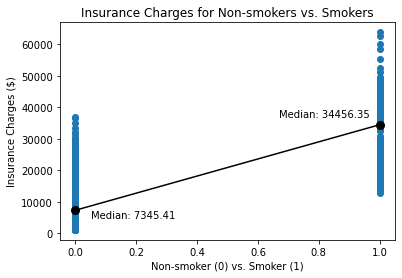

<Figure size 432x288 with 0 Axes>

In [162]:
# Grouping by 'smoker' column
charges_smoker = insurances.groupby('smoker').charges.median().reset_index()
smoker_median = charges_smoker.iloc[1,1]
non_smoker_median = charges_smoker.iloc[0,1]

# Plotting a scatterplot of 'smoker' vs. 'charges' with labels and a title
plt.scatter(insurances['smoker'], insurances['charges'])
plt.xlabel('Non-smoker (0) vs. Smoker (1)')
plt.ylabel('Insurance Charges ($)')
plt.title('Insurance Charges for Non-smokers vs. Smokers')
plt.plot([0,1], [non_smoker_median, smoker_median], color='k')
plt.plot(0, non_smoker_median, marker='o', color='k',markersize=8)
plt.plot(1, smoker_median, marker='o', color='k',markersize=8)
plt.text(0.05, 5000, f'Median: {round(non_smoker_median, 2)}', color='k')
plt.text(0.67, 37000, f'Median: {round(smoker_median, 2)}', color='k')
plt.show()
plt.clf()

The <b>median insurance charges of the non-smokers</b> is approximately <b>7345.41</b>, whereas the <b>median insurance charges for smokers </b> is approximately <b>34456.35</b>, <i><b>469.70%</b> higher than that of <b>non-smokers</b></i>. 

Although we can't directly conclude that the higher insurance charges are due to one's smoking habits, it is safe to speculate that <i>smokers tend to pay higher insurance charges on average compared to non-smokers </i>.


<h3> Part 2: Determine how the smoking habits in each sex affect the insurance charges </h3>

Now, we will divide the individuals of our dataset into four groups, according to their sex and smoking habit, and inspect how the insurance charges across different groups differ.

In [21]:
# Grouping based on the variables "smoker" and "sex"
smokers_sex = insurances.groupby(['smoker', 'sex']).charges.median().reset_index()
smokers_sex['sex'] = smokers_sex['sex'].apply(lambda x: 'male' if x ==1 else 'female')
smokers_sex_pivot = smokers_sex.pivot(columns='smoker', index='sex', values='charges').reset_index()
smokers_sex_pivot = smokers_sex_pivot.rename_axis(None, axis=1)
smokers_sex_pivot.rename(columns={0: 'non-smoker',1:'smoker'}, inplace=True)
print(smokers_sex_pivot)

      sex  non-smoker      smoker
0  female  7639.41745  28950.4692
1    male  6985.50695  36085.2190


Interestingly enough, smoking habit among the male participants incurred in <b>29099.71</b> increase in insurance charges, which is <b>37%</b> higher than the increase in the insurance charges incurred by the smoking habit of female participants, which is <b>21311.08</b>. <br>In other words, <i><b>'smoker'</b> variable affected the insurance charges of the male group 37% more than it affected that of the female group. This is vindicated by the higher correlation coefficient between 'smoker' and 'charge' in the male group than in the female group.

In [22]:
# Grouping based on sex
males = insurances[insurances['sex'] == 1]
females = insurances[insurances['sex'] == 2]
male_corr = males['smoker'].corr(males['charges'])
female_corr = females['smoker'].corr(females['charges'])
m_f_corr = pd.DataFrame({'sex': ['male', 'female'], 'corr_smoker_charges': [male_corr, female_corr]})
print(m_f_corr)

      sex  corr_smoker_charges
0    male             0.816579
1  female             0.746695


We can observe a trend from these tables that <i>in relation to insurance charges, smoking seems to be a more expensive habit for males than it is for females.</i>

<h3>Part 3: Determine how the insurance charges differ across the age groups.</h3>

Let us begin by grouping the individuals in our dataset into different age groups, with an interval of 10 years for each bin.

In [29]:
# Adding a new column specify which age group each individual falls into
my_bins=[10, 19, 29, 39, 49,59, 69]
my_labels = ['10s', '20s', '30s', '40s', '50s', '60s']
insurances['age_group'] = pd.cut(insurances['age'], bins=my_bins, labels=my_labels)

# Calculating the median insurance charges of each age group
age_group_charges_median = insurances.groupby('age_group').charges.median().reset_index()
age_group_charges_median.rename(columns={'charges': 'median_charges'},inplace=True)

print(age_group_charges_median)

  age_group  median_charges
0       10s     2138.070700
1       20s     3560.254575
2       30s     6082.405000
3       40s     8606.217400
4       50s    11729.679500
5       60s    14255.400500


The <b>median insurance charges of different age groups</b> increases from a younger group to an older group. We can speculate that <i>there exists a linear relationship between <b>'age'</b> and <b>'charges'</b></i>. <br><br>Let's take a look at the scatterplot of the insurance charges over different ages groups.


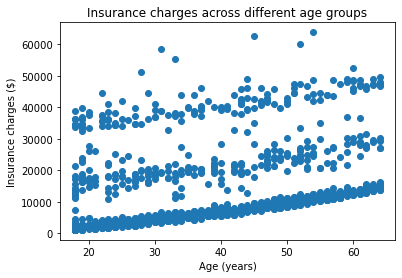

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(x=insurances.age, y=insurances.charges)
plt.title('Insurance charges across different age groups')
plt.xlabel('Age (years)')
plt.ylabel('Insurance charges ($)')
plt.show()
plt.clf()

As expected, the insurance chargses increase across from the younger to older age groups. A notable fact is that there seems to be a confounding variable that is grouping the clusters. 'smoker' seems to be a strong candidate that could explain the clustering, so we will come up with a new scatter plot taking this into account. 

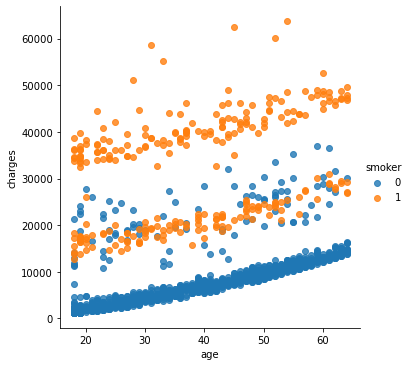

In [32]:
import seaborn as sns

sns.lmplot(x='age', y='charges', hue='smoker', data=insurances, fit_reg=False)
plt.show()

As speculated, the clustering can be explained by the 'smoker' variable. From this graph, we can see that across all age groups, smokers pay oustandingly higher insurance charges than do non-smokers.